In [1]:
%matplotlib inline 
# If we don't do this then image will open as pop-up and not in notebook

In [2]:
import pyarrow.parquet as pq 
import pandas as pd
import numpy as np
from PIL import Image as im
import matplotlib as plt
from matplotlib.pyplot import imshow

In [3]:
import wget
import time
import os
import copy

In [4]:
!ls -l ~/datasets/bengali-ai/

total 9126404
-rw-r--r-- 1 ubuntu ubuntu 4161805187 Jan 16 23:18 bengaliai-cv19.zip
-rw-r--r-- 1 ubuntu ubuntu       4830 Dec 19 18:22 class_map.csv
-rw-r--r-- 1 ubuntu ubuntu        944 Dec 19 18:22 sample_submission.csv
-rw-r--r-- 1 ubuntu ubuntu       1742 Dec 19 18:22 test.csv
-rw-r--r-- 1 ubuntu ubuntu    9903859 Dec 19 18:22 test_image_data_0.parquet
-rw-r--r-- 1 ubuntu ubuntu   10003997 Dec 19 18:22 test_image_data_1.parquet
-rw-r--r-- 1 ubuntu ubuntu    9996850 Dec 19 18:22 test_image_data_2.parquet
-rw-r--r-- 1 ubuntu ubuntu    9995989 Dec 19 18:22 test_image_data_3.parquet
-rw-r--r-- 1 ubuntu ubuntu    6281787 Dec 19 18:22 train.csv
-rw-r--r-- 1 ubuntu ubuntu 1285682162 Dec 19 18:22 train_image_data_0.parquet
-rw-r--r-- 1 ubuntu ubuntu 1278647926 Dec 19 18:25 train_image_data_1.parquet
-rw-r--r-- 1 ubuntu ubuntu 1287469785 Dec 19 18:29 train_image_data_2.parquet
-rw-r--r-- 1 ubuntu ubuntu 1285595675 Dec 19 18:32 train_image_data_3.parquet


### Class Mapping File

In [5]:
class_map = pd.read_csv("/home/ubuntu/datasets/bengali-ai/class_map.csv")

In [6]:
class_map.shape

(186, 3)

In [7]:
class_map.describe

<bound method NDFrame.describe of           component_type  label component
0          grapheme_root      0         ং
1          grapheme_root      1         ঃ
2          grapheme_root      2         অ
3          grapheme_root      3         আ
4          grapheme_root      4         ই
5          grapheme_root      5         ঈ
6          grapheme_root      6         উ
7          grapheme_root      7         ঊ
8          grapheme_root      8         ঋ
9          grapheme_root      9         এ
10         grapheme_root     10         ঐ
11         grapheme_root     11         ও
12         grapheme_root     12         ঔ
13         grapheme_root     13         ক
14         grapheme_root     14       ক্ক
15         grapheme_root     15       ক্ট
16         grapheme_root     16       ক্ত
17         grapheme_root     17       ক্ল
18         grapheme_root     18       ক্ষ
19         grapheme_root     19     ক্ষ্ণ
20         grapheme_root     20     ক্ষ্ম
21         grapheme_root     21       ক্স


In [8]:
class_map.head(20)

,component_type,label,component
0,grapheme_root,0,ং
1,grapheme_root,1,ঃ
2,grapheme_root,2,অ
3,grapheme_root,3,আ
4,grapheme_root,4,ই
5,grapheme_root,5,ঈ
6,grapheme_root,6,উ
7,grapheme_root,7,ঊ
8,grapheme_root,8,ঋ
9,grapheme_root,9,এ


### The Train Files

In [9]:
# Training data files
train_0 = pq.read_pandas('/home/ubuntu/datasets/bengali-ai/train_image_data_0.parquet').to_pandas()
train_1 = pq.read_pandas('/home/ubuntu/datasets/bengali-ai/train_image_data_1.parquet').to_pandas()
train_2 = pq.read_pandas('/home/ubuntu/datasets/bengali-ai/train_image_data_2.parquet').to_pandas()
train_3 = pq.read_pandas('/home/ubuntu/datasets/bengali-ai/train_image_data_3.parquet').to_pandas()

In [10]:
type(train_0)

pandas.core.frame.DataFrame

In [11]:
train_0.shape

(50210, 32333)

In [12]:
train_0.describe

<bound method NDFrame.describe of           image_id    0    1    2    3    4    5    6    7    8  ...  32322  \
0          Train_0  254  253  252  253  251  252  253  251  251  ...    253   
1          Train_1  251  244  238  245  248  246  246  247  251  ...    255   
2          Train_2  251  250  249  250  249  245  247  252  252  ...    254   
3          Train_3  247  247  249  253  253  252  251  251  250  ...    254   
4          Train_4  249  248  246  246  248  244  242  242  229  ...    255   
5          Train_5  251  251  252  253  251  249  248  248  249  ...    252   
6          Train_6  238  236  234  235  238  242  241  237  230  ...    251   
7          Train_7  250  251  252  252  252  252  252  252  252  ...    253   
8          Train_8  251  252  251  253  254  253  254  253  254  ...    253   
9          Train_9  251  249  252  253  253  253  253  253  253  ...    253   
10        Train_10  250  252  252  252  251  250  249  246  244  ...    252   
11        Train_11

In [13]:
train_0[:1]

,image_id,0,1,2,3,4,5,6,7,8,...,32322,32323,32324,32325,32326,32327,32328,32329,32330,32331
0,Train_0,254,253,252,253,251,252,253,251,251,...,253,253,253,253,253,253,253,253,253,251


Training data label file

In [14]:
# Training label files
train_labels = pd.read_csv("/home/ubuntu/datasets/bengali-ai/train.csv")

In [15]:
train_labels.head()

,image_id,grapheme_root,vowel_diacritic,consonant_diacritic,grapheme
0,Train_0,15,9,5,ক্ট্রো
1,Train_1,159,0,0,হ
2,Train_2,22,3,5,খ্রী
3,Train_3,53,2,2,র্টি
4,Train_4,71,9,5,থ্রো


In [16]:
train_labels.shape

(200840, 5)

In [17]:
train_labels['grapheme_root'].max(), train_labels['grapheme_root'].min(), train_labels['grapheme_root'].unique()

(167,
 0,
 array([ 15, 159,  22,  53,  71, 153,  52, 139,  67,  64, 115, 107,  74,
        100,  48,  72,  13,  79, 109,  23,  42,  60, 142,  61, 147,  81,
        148, 160,  58,  99, 103,  44, 167, 120,  62, 151,  32, 125,  38,
        127,  24, 124,  96,  43, 132, 149, 123,  54,  19,  87,  35,  83,
         97,  77, 165,  92, 133, 118,  85,  56,  95, 136, 138, 106,  86,
         29,  39, 122,  65,  30,  76,  16,  68, 110,  46, 105, 155, 129,
         25,  59,  36,  70, 152,  18,  89, 128, 113, 144,  49, 117, 154,
         31,   6,  26, 150,  40, 111,  55,   1, 119, 140,  66,  28,  14,
        164,  27, 121, 156,  63,  84, 137,  98, 143,  47, 135,  75, 141,
         88, 116,  91,  45,  69,  94,  93, 131, 146, 134, 112, 108,   9,
         80,   3, 166,  41,  17, 162,  21, 158,  10,  51, 101,  82,  57,
          4,   5,  90,  20,   2, 102, 126,  33, 161,  34,  50,   7, 163,
         78,  73, 145, 130,   0, 104,   8,  37,  11, 157, 114,  12]))

### The Test Files

In [18]:
test_0 = pq.read_pandas('/home/ubuntu/datasets/bengali-ai/test_image_data_0.parquet').to_pandas()

In [20]:
test_0.shape

(3, 32333)

In [21]:
test_0[:]

,image_id,0,1,2,3,4,5,6,7,8,...,32322,32323,32324,32325,32326,32327,32328,32329,32330,32331
0,Test_0,247,253,253,252,252,252,252,253,253,...,254,254,254,254,254,254,253,253,252,250
1,Test_1,253,253,253,253,253,253,253,253,253,...,255,255,255,255,255,255,255,255,255,255
2,Test_2,253,253,253,253,253,252,251,252,252,...,255,255,255,255,255,255,255,254,253,252


### Sample submission format

In [22]:
sample_submission = pd.read_csv('/home/ubuntu/datasets/bengali-ai/sample_submission.csv')

In [23]:
sample_submission.head(20)

,row_id,target
0,Test_0_consonant_diacritic,0
1,Test_0_grapheme_root,0
2,Test_0_vowel_diacritic,0
3,Test_1_consonant_diacritic,0
4,Test_1_grapheme_root,0
5,Test_1_vowel_diacritic,0
6,Test_2_consonant_diacritic,0
7,Test_2_grapheme_root,0
8,Test_2_vowel_diacritic,0
9,Test_3_consonant_diacritic,0


In [24]:
!ls -l /home/ubuntu/datasets/bengali-ai/

total 9126404
-rw-r--r-- 1 ubuntu ubuntu 4161805187 Jan 16 23:18 bengaliai-cv19.zip
-rw-r--r-- 1 ubuntu ubuntu       4830 Dec 19 18:22 class_map.csv
-rw-r--r-- 1 ubuntu ubuntu        944 Dec 19 18:22 sample_submission.csv
-rw-r--r-- 1 ubuntu ubuntu       1742 Dec 19 18:22 test.csv
-rw-r--r-- 1 ubuntu ubuntu    9903859 Dec 19 18:22 test_image_data_0.parquet
-rw-r--r-- 1 ubuntu ubuntu   10003997 Dec 19 18:22 test_image_data_1.parquet
-rw-r--r-- 1 ubuntu ubuntu    9996850 Dec 19 18:22 test_image_data_2.parquet
-rw-r--r-- 1 ubuntu ubuntu    9995989 Dec 19 18:22 test_image_data_3.parquet
-rw-r--r-- 1 ubuntu ubuntu    6281787 Dec 19 18:22 train.csv
-rw-r--r-- 1 ubuntu ubuntu 1285682162 Dec 19 18:22 train_image_data_0.parquet
-rw-r--r-- 1 ubuntu ubuntu 1278647926 Dec 19 18:25 train_image_data_1.parquet
-rw-r--r-- 1 ubuntu ubuntu 1287469785 Dec 19 18:29 train_image_data_2.parquet
-rw-r--r-- 1 ubuntu ubuntu 1285595675 Dec 19 18:32 train_image_data_3.parquet


### Understanding the data format

(train/test).parquet

Each parquet file contains tens of thousands of 137x236 grayscale images. The images have been provided in the parquet format for I/O and space efficiency. Each row in the parquet files contains an image_id column, and the flattened image.

In [25]:
train_0.shape

(50210, 32333)

In [26]:
train_0[:1]

,image_id,0,1,2,3,4,5,6,7,8,...,32322,32323,32324,32325,32326,32327,32328,32329,32330,32331
0,Train_0,254,253,252,253,251,252,253,251,251,...,253,253,253,253,253,253,253,253,253,251


In [27]:
137*236

32332

In [28]:
train_0[train_0.columns[0]].head(), train_0[train_0.columns[0]].tail()

(0    Train_0
 1    Train_1
 2    Train_2
 3    Train_3
 4    Train_4
 Name: image_id, dtype: object, 50205    Train_50205
 50206    Train_50206
 50207    Train_50207
 50208    Train_50208
 50209    Train_50209
 Name: image_id, dtype: object)

In [29]:
train_1[train_1.columns[0]].head(), train_1[train_1.columns[0]].tail()

(0    Train_50210
 1    Train_50211
 2    Train_50212
 3    Train_50213
 4    Train_50214
 Name: image_id, dtype: object, 50205    Train_100415
 50206    Train_100416
 50207    Train_100417
 50208    Train_100418
 50209    Train_100419
 Name: image_id, dtype: object)

In [30]:
train_2[train_2.columns[0]].head(), train_2[train_2.columns[0]].tail()

(0    Train_100420
 1    Train_100421
 2    Train_100422
 3    Train_100423
 4    Train_100424
 Name: image_id, dtype: object, 50205    Train_150625
 50206    Train_150626
 50207    Train_150627
 50208    Train_150628
 50209    Train_150629
 Name: image_id, dtype: object)

In [31]:
train_3[train_3.columns[0]].head(), train_3[train_3.columns[0]].tail()

(0    Train_150630
 1    Train_150631
 2    Train_150632
 3    Train_150633
 4    Train_150634
 Name: image_id, dtype: object, 50205    Train_200835
 50206    Train_200836
 50207    Train_200837
 50208    Train_200838
 50209    Train_200839
 Name: image_id, dtype: object)

In [32]:
train = pd.concat([train_0, train_1, train_2, train_3],ignore_index=True)
train_0.shape, train_1.shape, train.shape

((50210, 32333), (50210, 32333), (200840, 32333))

In [33]:
# Let's free-up some memory
del train_0, train_1, train_2, train_3

In [178]:
# train[1:]

### Getting the data ready

In [31]:
# We need to convert the flat (1D) imaging pixel data into 2D images. 
# Note as this is character recognition dataset with grayscale images (not in 3-channel formart with usual RGB)

In [34]:
# Let's select the data for first 2 images
im_2 = train[train.columns[1:]].head(2)

In [35]:
len(im_2), im_2

(2,
      0    1    2    3    4    5    6    7    8    9  ...  32322  32323  32324  \
 0  254  253  252  253  251  252  253  251  251  253  ...    253    253    253   
 1  251  244  238  245  248  246  246  247  251  252  ...    255    255    255   
 
    32325  32326  32327  32328  32329  32330  32331  
 0    253    253    253    253    253    253    251  
 1    255    255    255    255    255    255    254  
 
 [2 rows x 32332 columns])

In [36]:
type(im_2), im_2.shape

(pandas.core.frame.DataFrame, (2, 32332))

In [37]:
im_2[1:]

,0,1,2,3,4,5,6,7,8,9,...,32322,32323,32324,32325,32326,32327,32328,32329,32330,32331
1,251,244,238,245,248,246,246,247,251,252,...,255,255,255,255,255,255,255,255,255,254


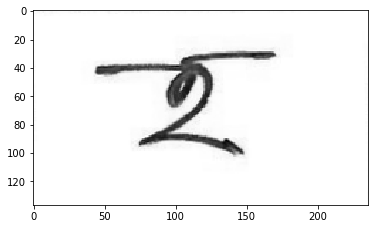

In [38]:
# Let's create an image from the flat pixel data and display it
tt = np.array(im_2.iloc[1]).reshape(137,236)

# Image.fromarray would create a 2D numpy array from a row of pandas dataframe
img = im.fromarray(obj=tt, mode='L') # The mode could be RGB for 3D data or "L", "I", "1" for 2-D data

imshow(img, cmap='gray') # If we don't add cmap arg then we see a colorful image.`

In [39]:
# PyTorch databuild libraries and modules
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torchvision import datasets, models, transforms

In [38]:
# Let's define the data augmentation and normalization for training
# We are not going to flip the images horrizontally or vertically as they contain alphabates
# data_transforms = {
#     'train': transforms.Compose([
#         transforms.Resize(124),
#         transforms.ToTensor(),
#         transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
#     ]),
#     'val': transforms.Compose([
#         transforms.Resize(124),
#         transforms.ToTensor(),
#         transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
#     ]),
# }

Let's write a simple function to display an image

In [40]:
def show_image(dataframe, n):
    img_name = dataframe.iloc[n, 0]
    img_data = np.array(dataframe.iloc[n, 1:])
    img_data = img_data.astype('float').reshape(137,236)
    imshow(img_data, cmap='gray')

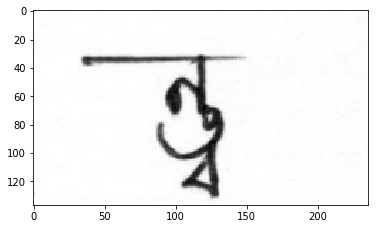

In [41]:
show_image(train, 65)

Now let's try to create a class which can help us to get the image data in raw or transformed format.

In [42]:
import torch
from torchvision import datasets, models, transforms

In [79]:
class BengaliCharacterDataset(Dataset):
    """Bengali language handwritten character dataset."""
    
    def __init__(self, dataframe, transform=None):
        """
        Args:
            dataframe (string): Dataframe of parquet dataset with image data.
            transform (callable, optional): Optional transform to be applied
                on a sample.
        """
        self.data_frame = pd.DataFrame(dataframe)
        self.transform = transform

    def __len__(self):
        return len(self.data_frame)

    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()

        img_name = self.data_frame.iloc[idx, 0]
        # columns from class_map: image_id, grapheme_root, vowel_diacritic, consonant_diacritic, grapheme
        img_label = train_labels.loc[train_labels['image_id'] == img_name, 'grapheme_root'].to_numpy()[0] 
        # added to.numpy()[0] to remove index number
        
        img_data = np.array(self.data_frame.iloc[idx, 1:])
        img_data = img_data.astype('float').reshape(137,236)
        # imshow(img_data, cmap='gray')
        
        # np_arr_img = im.fromarray(img_data)
        # sample = {'img_label': img_label, 'image': np_arr_img}

        # sample = {'image': img_data, 'img_label': img_label}
        
        if self.transform:
            img_data = self.transform(im.fromarray(img_data).convert('RGB'))
            # sample = {'img_label': img_label, 'image': img_data}

        return img_data, img_label

In [44]:
# refer actual class value
train_labels.loc[train_labels['image_id'] == 'Train_65', 'grapheme_root'].to_numpy()[0]

87

In [45]:
ben_char_dataset = BengaliCharacterDataset(train)

In [46]:
ben_char_dataset.__len__()

200840

In [47]:
tt = ben_char_dataset.__getitem__(idx = 65)
type(tt),tt

(tuple, (array([[251., 253., 251., ..., 253., 253., 252.],
         [254., 254., 254., ..., 252., 252., 253.],
         [253., 254., 255., ..., 251., 251., 252.],
         ...,
         [250., 254., 254., ..., 253., 254., 254.],
         [252., 254., 254., ..., 253., 253., 253.],
         [252., 252., 253., ..., 252., 252., 253.]]), 87))

In [48]:
tt[1]

87

(87, <matplotlib.image.AxesImage at 0x7fd0fd1e69e8>)

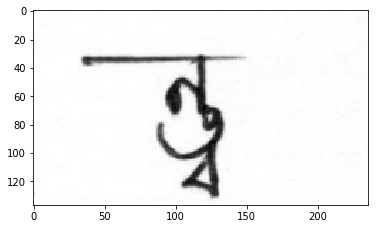

In [49]:
# We got the raw, non-transformed image with idx = 65
np_arr_img = im.fromarray(tt[0])
tt[1], imshow(np_arr_img, cmap='gray')

In [80]:
# Now let's create a PyTorch Dataset object with transformations
transformed_dataset = BengaliCharacterDataset(train,
                                           transform=transforms.Compose([
                                               transforms.Resize((224,224),interpolation=im.NEAREST),# We are resizinh the original image to even larger dimentions
                                               transforms.ToTensor()
                                               #transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
                                           ]))

In [48]:
## NOTE: The default resizing occurs with BILINEAR interpolation, which we have changed to NEAREST
# It seems there are many algorithms to resize images, need to explore more on this

In [81]:
tt = transformed_dataset.__getitem__(65)

In [82]:
len(tt), tt

(2, (tensor([[[0.9843, 0.9922, 0.9843,  ..., 0.9922, 0.9922, 0.9882],
           [0.9843, 0.9922, 0.9843,  ..., 0.9922, 0.9922, 0.9882],
           [0.9961, 0.9961, 0.9961,  ..., 0.9882, 0.9882, 0.9922],
           ...,
           [0.9882, 0.9961, 0.9961,  ..., 0.9922, 0.9922, 0.9922],
           [0.9882, 0.9882, 0.9922,  ..., 0.9882, 0.9882, 0.9922],
           [0.9882, 0.9882, 0.9922,  ..., 0.9882, 0.9882, 0.9922]],
  
          [[0.9843, 0.9922, 0.9843,  ..., 0.9922, 0.9922, 0.9882],
           [0.9843, 0.9922, 0.9843,  ..., 0.9922, 0.9922, 0.9882],
           [0.9961, 0.9961, 0.9961,  ..., 0.9882, 0.9882, 0.9922],
           ...,
           [0.9882, 0.9961, 0.9961,  ..., 0.9922, 0.9922, 0.9922],
           [0.9882, 0.9882, 0.9922,  ..., 0.9882, 0.9882, 0.9922],
           [0.9882, 0.9882, 0.9922,  ..., 0.9882, 0.9882, 0.9922]],
  
          [[0.9843, 0.9922, 0.9843,  ..., 0.9922, 0.9922, 0.9882],
           [0.9843, 0.9922, 0.9843,  ..., 0.9922, 0.9922, 0.9882],
           [0.9961,

In [85]:
tt[0]

tensor([[[0.9843, 0.9922, 0.9843,  ..., 0.9922, 0.9922, 0.9882],
         [0.9843, 0.9922, 0.9843,  ..., 0.9922, 0.9922, 0.9882],
         [0.9961, 0.9961, 0.9961,  ..., 0.9882, 0.9882, 0.9922],
         ...,
         [0.9882, 0.9961, 0.9961,  ..., 0.9922, 0.9922, 0.9922],
         [0.9882, 0.9882, 0.9922,  ..., 0.9882, 0.9882, 0.9922],
         [0.9882, 0.9882, 0.9922,  ..., 0.9882, 0.9882, 0.9922]],

        [[0.9843, 0.9922, 0.9843,  ..., 0.9922, 0.9922, 0.9882],
         [0.9843, 0.9922, 0.9843,  ..., 0.9922, 0.9922, 0.9882],
         [0.9961, 0.9961, 0.9961,  ..., 0.9882, 0.9882, 0.9922],
         ...,
         [0.9882, 0.9961, 0.9961,  ..., 0.9922, 0.9922, 0.9922],
         [0.9882, 0.9882, 0.9922,  ..., 0.9882, 0.9882, 0.9922],
         [0.9882, 0.9882, 0.9922,  ..., 0.9882, 0.9882, 0.9922]],

        [[0.9843, 0.9922, 0.9843,  ..., 0.9922, 0.9922, 0.9882],
         [0.9843, 0.9922, 0.9843,  ..., 0.9922, 0.9922, 0.9882],
         [0.9961, 0.9961, 0.9961,  ..., 0.9882, 0.9882, 0.

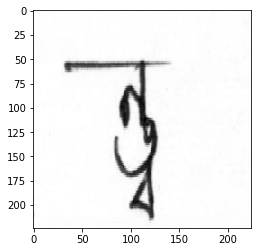

In [90]:
# to_pil = transforms.ToPILImage() 
imshow(tt[0][0], cmap='gray')

### Creating a validation dataset from training data

In [91]:
validation_split = .2
shuffle_dataset = True
random_seed= 42

# Creating data indices for training and validation splits:
dataset_size = len(transformed_dataset)
indices = list(range(dataset_size))

In [92]:
# Let's make sure there are no duplicates in indices before creating a validation data based on it
idx = transformed_dataset.data_frame.index
len(idx), min(idx), max(idx), idx.duplicated().sum()

(200840, 0, 200839, 0)

In [93]:
from torch.utils.data.sampler import SubsetRandomSampler

In [94]:
split = int(np.floor(validation_split * dataset_size))
# split = 40,168

if shuffle_dataset :
    np.random.seed(random_seed)
    np.random.shuffle(indices)
train_indices, val_indices = indices[split:], indices[:split]

# Creating PT data samplers and loaders:
train_sampler = SubsetRandomSampler(train_indices)
valid_sampler = SubsetRandomSampler(val_indices)

In [95]:
# Let's check how it looks
len(train_sampler), len(valid_sampler), train_sampler, train_sampler.indices[0:10]

(160672,
 40168,
 [21197,
  177037,
  173023,
  116372,
  186887,
  73520,
  145819,
  168841,
  120425,
  194829])

In [96]:
sampler= {}
sampler['train'] = train_sampler
sampler['val'] = valid_sampler

In [97]:
sampler['val']

### Getting the dataloader ready

Within a Python process, the Global Interpreter Lock (GIL) prevents true fully parallelizing Python code across threads. To avoid blocking computation code with data loading, PyTorch provides an easy switch to perform multi-process data loading by simply setting the argument num_workers to a positive integer.

In [98]:
dataloaders = {x: DataLoader(transformed_dataset, 
                             sampler=sampler[x], 
                             batch_size=4,
                             #shuffle=True, 
                             num_workers=4)
              for x in ['train', 'val']}

In [99]:
len(dataloaders['train'].dataset)

200840

In [100]:
dataset_sizes = {x: len(dataloaders[x].dataset) for x in ['train', 'val']}

In [78]:
# class_names = dataloaders['train'].dataset.
# dataset_sizes['train']

In [101]:
dataloaders['train'].dataset.data_frame.shape, dataloaders['val'].dataset.data_frame.shape

((200840, 32333), (200840, 32333))

In [102]:
def train_model(model, criterion, optimizer, scheduler, num_epochs=25):
    since = time.time()
    
    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch, num_epochs - 1))
        print('-' * 10)

        # Each epoch has a training and validation phase
        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evaluate mode

            running_loss = 0.0
            running_corrects = 0

            # Iterate over data.
            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)

                # zero the parameter gradients
                optimizer.zero_grad()

                # forward
                # track history if only in train
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    # backward + optimize only if in training phase
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                # statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)
            if phase == 'train':
                scheduler.step()

            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase]

            print('{} Loss: {:.4f} Acc: {:.4f}'.format(
                phase, epoch_loss, epoch_acc))

            # deep copy the model
            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())

        print()

    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(
        time_elapsed // 60, time_elapsed % 60))
    print('Best val Acc: {:4f}'.format(best_acc))

    # load best model weights
    model.load_state_dict(best_model_wts)
    return model

In [103]:
# PyTorch libraries and modules
from torch.optim import lr_scheduler
import torch.nn as nn
import torch.optim as optim
import torch

In [104]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [105]:
# Load a pretrained model and reset final fully connected layer.

model_ft = models.resnet18(pretrained=True)
num_ftrs = model_ft.fc.in_features

# Here the size of each output sample is set to 168.
# Alternatively, it can be generalized to nn.Linear(num_ftrs, len(class_names)).
model_ft.fc = nn.Linear(num_ftrs, 168)

# Ensuring the model is using GPU
model_ft = model_ft.to(device)

# As we have two classes (0 or 1) we will use cross-entropy as criterion
criterion = nn.CrossEntropyLoss()

# Observe that all parameters are being optimized
optimizer_ft = optim.SGD(model_ft.parameters(), lr=0.001, momentum=0.9)

# Decay LR by a factor of 0.1 every 7 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1)

In [106]:
model_ft = train_model(model_ft, criterion, optimizer_ft, exp_lr_scheduler,
                       num_epochs=5)

Epoch 0/4
----------
train Loss: 0.7334 Acc: 0.6115
val Loss: 0.0802 Acc: 0.1790

Epoch 1/4
----------
train Loss: 0.2739 Acc: 0.7241
val Loss: 0.0601 Acc: 0.1839

Epoch 2/4
----------
train Loss: 0.1872 Acc: 0.7467
val Loss: 0.0570 Acc: 0.1850

Epoch 3/4
----------
train Loss: 0.1367 Acc: 0.7599
val Loss: 0.0545 Acc: 0.1868

Epoch 4/4
----------
train Loss: 0.1027 Acc: 0.7698
val Loss: 0.0544 Acc: 0.1869

Training complete in 149m 36s
Best val Acc: 0.186860
